In [23]:
import numpy as np
import pandas as pd

df = pd.read_csv("C:/Semester Work/DAV Project/datasets/vlrDataset.csv")

print("Null Values in the Dataframe")

print()

print(df.isnull().sum())

df = df.dropna()

print()

print("Null Values Dropped")

print()

print(df.isnull().sum())

print()

print(f"Duplicate Values in the Dataframe: {df.duplicated().sum()}")

listOfTeams = [[], []]

listOfTeams[0] = list(df["team1_Name"])
listOfTeams[1] = list(df["team2_Name"])

setOfTeams = [[set(listOfTeams[0])], [set(listOfTeams[1])]]

finalSet = []

for i in range(len(listOfTeams[0])):
    finalSet.append(listOfTeams[0][i])

for i in range(len(listOfTeams[1])):
    finalSet.append(listOfTeams[1][i])

finalSet = set(finalSet)

teamEncoding = {team: idx for idx, team in enumerate(finalSet)}

df["team1Encoded"] = df["team1_Name"].map(teamEncoding)
df["team2Encoded"] = df["team2_Name"].map(teamEncoding)

listOfAgents = (
    list(df["agent1"])
    + list(df["agent2"])
    + list(df["agent3"])
    + list(df["agent4"])
    + list(df["agent5"])
    + list(df["agent6"])
    + list(df["agent7"])
    + list(df["agent8"])
    + list(df["agent9"])
    + list(df["agent10"])
)

setOfAgents = set(listOfAgents)

agentEncoding = {agent: idx for idx, agent in enumerate(setOfAgents)}

df["agent1Encoded"] = df["agent1"].map(agentEncoding)
df["agent2Encoded"] = df["agent2"].map(agentEncoding)
df["agent3Encoded"] = df["agent3"].map(agentEncoding)
df["agent4Encoded"] = df["agent4"].map(agentEncoding)
df["agent5Encoded"] = df["agent5"].map(agentEncoding)
df["agent6Encoded"] = df["agent6"].map(agentEncoding)
df["agent7Encoded"] = df["agent7"].map(agentEncoding)
df["agent8Encoded"] = df["agent8"].map(agentEncoding)
df["agent9Encoded"] = df["agent9"].map(agentEncoding)
df["agent10Encoded"] = df["agent10"].map(agentEncoding)

listOfMaps = list(df["mapName"])
setOfMaps = set(listOfMaps)

mapEncoding = {map: idx for idx, map in enumerate(setOfMaps)}

df["encodedMapName"] = df["mapName"].map(mapEncoding)

df["year"] = None

df.loc[(df["patchID"] >= 2.04) & (df["patchID"] <= 3.10), "year"] = 2021
df.loc[(df["patchID"] >= 4.02) & (df["patchID"] <= 5.04), "year"] = 2022
df.loc[(df["patchID"] >= 6.02) & (df["patchID"] <= 7.02), "year"] = 2023
df.loc[(df["patchID"] >= 8.02) & (df["patchID"] <= 9.02), "year"] = 2024

df["team1Agents"] = (
    df[
        [
            "agent1Encoded",
            "agent2Encoded",
            "agent3Encoded",
            "agent4Encoded",
            "agent5Encoded",
        ]
    ]
    .astype(str)
    .apply(lambda x: ", ".join(x), axis=1)
)

df["team2Agents"] = (
    df[
        [
            "agent6Encoded",
            "agent7Encoded",
            "agent8Encoded",
            "agent9Encoded",
            "agent10Encoded",
        ]
    ]
    .astype(str)
    .apply(lambda x: ", ".join(x), axis=1)
)

processedDF = df[
    [
        "year",
        "team1Encoded",
        "team2Encoded",
        "encodedMapName",
        "team1Score",
        "team2Score",
        "agent1Encoded",
        "agent2Encoded",
        "agent3Encoded",
        "agent4Encoded",
        "agent5Encoded",
        "agent6Encoded",
        "agent7Encoded",
        "agent8Encoded",
        "agent9Encoded",
        "agent10Encoded",
        "team1Agents",
        "team2Agents",
    ]
]

processedDF.to_csv("C:/Semester Work/DAV Project/datasets/processedVLRDataset.csv", index=False)

Null Values in the Dataframe

patchID       0
team1_Name    0
team2_Name    0
mapName       0
team1Score    0
team2Score    0
agent1        2
agent2        2
agent3        2
agent4        2
agent5        2
agent6        2
agent7        2
agent8        2
agent9        2
agent10       2
dtype: int64

Null Values Dropped

patchID       0
team1_Name    0
team2_Name    0
mapName       0
team1Score    0
team2Score    0
agent1        0
agent2        0
agent3        0
agent4        0
agent5        0
agent6        0
agent7        0
agent8        0
agent9        0
agent10       0
dtype: int64

Duplicate Values in the Dataframe: 0


In [2]:
df.head()

,patchID,team1_Name,team2_Name,mapName,team1Score,team2Score,agent1,agent2,agent3,agent4,...,agent5Encoded,agent6Encoded,agent7Encoded,agent8Encoded,agent9Encoded,agent10Encoded,encodedMapName,year,team1Agents,team2Agents
0,2.04,Envy,Gen.G,Haven,13,6,Phoenix,Sova,Raze,Cypher,...,10,10,0,17,7,8,3,2021,"7, 0, 22, 8, 10","10, 0, 17, 7, 8"
1,2.04,Envy,Gen.G,Icebox,5,13,Sova,Killjoy,Phoenix,Raze,...,10,17,11,10,3,0,0,2021,"0, 11, 7, 22, 10","17, 11, 10, 3, 0"
2,2.04,Envy,Gen.G,Bind,13,10,Phoenix,Omen,Sova,Raze,...,8,10,8,0,22,3,10,2021,"7, 10, 0, 22, 8","10, 8, 0, 22, 3"
3,2.04,XSET,FaZe Clan,Haven,6,13,Sova,Jett,Raze,Omen,...,8,17,0,22,10,21,3,2021,"0, 17, 22, 10, 8","17, 0, 22, 10, 21"
4,2.04,XSET,FaZe Clan,Bind,3,13,Sova,Raze,Jett,Omen,...,8,22,0,21,17,10,10,2021,"0, 22, 17, 10, 8","22, 0, 21, 17, 10"


In [3]:
processedDF.head()

,year,team1Encoded,team2Encoded,encodedMapName,team1Score,team2Score,agent1Encoded,agent2Encoded,agent3Encoded,agent4Encoded,agent5Encoded,agent6Encoded,agent7Encoded,agent8Encoded,agent9Encoded,agent10Encoded,team1Agents,team2Agents
0,2021,74,7,3,13,6,7,0,22,8,10,10,0,17,7,8,"7, 0, 22, 8, 10","10, 0, 17, 7, 8"
1,2021,74,7,0,5,13,0,11,7,22,10,17,11,10,3,0,"0, 11, 7, 22, 10","17, 11, 10, 3, 0"
2,2021,74,7,10,13,10,7,10,0,22,8,10,8,0,22,3,"7, 10, 0, 22, 8","10, 8, 0, 22, 3"
3,2021,52,24,3,6,13,0,17,22,10,8,17,0,22,10,21,"0, 17, 22, 10, 8","17, 0, 22, 10, 21"
4,2021,52,24,10,3,13,0,22,17,10,8,22,0,21,17,10,"0, 22, 17, 10, 8","22, 0, 21, 17, 10"


In [ ]:
# Multilinear Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df = pd.read_csv('C:/Semester Work/DAV Project/datasets/processedVLRDataset.csv')

df['team1Win'] = (df['team1Score'] >= 13).astype(int)

def multiple_linear_regression_with_map(test_year, team1, team2, map_name):
    train_data = df[df['year'] == test_year]
    
    if train_data.empty:
        return f"No data available for the year {test_year}."
    
    X = train_data[['year', 'team1Encoded', 'team2Encoded', 'encodedMapName']]
    y = train_data['team1Win']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    linear_model = LinearRegression()
    linear_model.fit(X_train, y_train)
    
    y_pred = linear_model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    
    y_pred_binary = (y_pred >= 0.5).astype(int)  # 1 if predicted probability >= 0.5, else 0
    
    accuracy = (y_pred_binary == y_test).mean() * 100  # Accuracy as a percentage
    
    team1_encoded = teamEncoding.get(team1, None)
    team2_encoded = teamEncoding.get(team2, None)
    map_encoded = mapEncoding.get(map_name, None)
    
    if team1_encoded is None or team2_encoded is None or map_encoded is None:
        return "Error: One or more inputs (team names or map name) are not recognized!"
    
    input_data = pd.DataFrame(
        [[test_year, team1_encoded, team2_encoded, map_encoded]], 
        columns=['year', 'team1Encoded', 'team2Encoded', 'encodedMapName']
    )
    prediction = linear_model.predict(input_data)
    
    winner = team1 if prediction[0] >= 0.5 else team2
    
    return {
        "mse": mse,
        "accuracy": accuracy,
        "predicted_winner": winner
    }

test_year = 2024
test_team1 = "Sentinels"
test_team2 = "Gen.G"  
test_map = "Ascent"     

linear_result = multiple_linear_regression_with_map(test_year, test_team1, test_team2, test_map)

print(f"Multiple Linear Regression MSE: {linear_result['mse']:.2f}")
print(f"Accuracy Percentage (Multiple Linear Regression): {linear_result['accuracy']:.2f}%")
print(f"Predicted Winner (Multiple Linear Regression): {linear_result['predicted_winner']}")

Multiple Linear Regression MSE: 0.24
Accuracy Percentage (Multiple Linear Regression): 68.60%
Predicted Winner (Multiple Linear Regression): Sentinels


In [ ]:
# Logistic Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv('C:/Semester Work/DAV Project/datasets/processedVLRDataset.csv')

df['team1Win'] = (df['team1Score'] >= 13).astype(int)

def logistic_regression_with_map(test_year, team1, team2, map_name):
    train_data = df[df['year'] == test_year]
    
    if train_data.empty:
        return f"No data available for the year {test_year}."
    
    X = train_data[['year', 'team1Encoded', 'team2Encoded', 'encodedMapName']]
    y = train_data['team1Win']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    log_model = LogisticRegression(max_iter=1000)
    log_model.fit(X_train, y_train)
    
    y_pred = log_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    
    team1_encoded = teamEncoding.get(team1, None)
    team2_encoded = teamEncoding.get(team2, None)
    map_encoded = mapEncoding.get(map_name, None)
    
    if team1_encoded is None or team2_encoded is None or map_encoded is None:
        return "Error: One or more inputs (team names or map name) are not recognized!"
    
    input_data = pd.DataFrame(
        [[test_year, team1_encoded, team2_encoded, map_encoded]], 
        columns=['year', 'team1Encoded', 'team2Encoded', 'encodedMapName']
    )
    prediction = log_model.predict(input_data)
    
    winner = team1 if prediction[0] == 1 else team2
    
    return {
        "accuracy": accuracy,
        "predicted_winner": winner
    }

test_year = 2023
test_team1 = "Evil Geniuses"  
test_team2 = "FNATIC"  
test_map = "Fracture"     

log_result = logistic_regression_with_map(test_year, test_team1, test_team2, test_map)

print(f"Accuracy Percentage (Logistic Regression): {log_result['accuracy']:.2f}%")
print(f"Predicted Winner (Logistic Regression): {log_result['predicted_winner']}")

Accuracy Percentage (Logistic Regression): 57.89%
Predicted Winner (Logistic Regression): FNATIC


In [ ]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv('C:/Semester Work/DAV Project/datasets/processedVLRDataset.csv')

df['team1Win'] = (df['team1Score'] >= 13).astype(int)

def random_forest_with_map(test_year, team1, team2, map_name):
    train_data = df[df['year'] == test_year]
    
    if train_data.empty:
        return f"No data available for the year {test_year}."
    
    X = train_data[['year', 'team1Encoded', 'team2Encoded', 'encodedMapName']]
    y = train_data['team1Win']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_train, y_train)
    
    y_pred = rf_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    
    team1_encoded = teamEncoding.get(team1, None)
    team2_encoded = teamEncoding.get(team2, None)
    map_encoded = mapEncoding.get(map_name, None)
    
    if team1_encoded is None or team2_encoded is None or map_encoded is None:
        return "Error: One or more inputs (team names or map name) are not recognized!"
    
    input_data = pd.DataFrame(
        [[test_year, team1_encoded, team2_encoded, map_encoded]], 
        columns=['year', 'team1Encoded', 'team2Encoded', 'encodedMapName']
    )
    prediction = rf_model.predict(input_data)
    
    winner = team1 if prediction[0] == 1 else team2
    
    return {
        "accuracy": accuracy,
        "predicted_winner": winner
    }

test_year = 2023
test_team1 = "Evil Geniuses"  
test_team2 = "FNATIC"  
test_map = "Ascent"     

rf_result = random_forest_with_map(test_year, test_team1, test_team2, test_map)

print(f"Accuracy Percentage (Random Forest): {rf_result['accuracy']:.2f}%")
print(f"Predicted Winner (Random Forest): {rf_result['predicted_winner']}")

Accuracy Percentage (Random Forest): 72.37%
Predicted Winner (Random Forest): Evil Geniuses


In [ ]:
# SVM

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

df = pd.read_csv('C:/Semester Work/DAV Project/datasets/processedVLRDataset.csv')

df['team1Win'] = (df['team1Score'] >= 13).astype(int)

def prepare_data_for_year(test_year):
    year_data = df[df['year'] == test_year]
    if year_data.empty:
        raise ValueError(f"No data available for the year {test_year}.")
    
    X = year_data[['year', 'team1Encoded', 'team2Encoded', 'encodedMapName']]
    y = year_data['team1Win']
    return X, y

def train_svm_model(test_year, team1, team2, map_name):
    X, y = prepare_data_for_year(test_year)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train['year'] = scaler.fit_transform(X_train[['year']])
    X_test['year'] = scaler.transform(X_test[['year']])
    
    svm = SVC(kernel='rbf', probability=True, random_state=42)
    svm.fit(X_train, y_train)
    
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred) * 100
    
    team1_encoded = teamEncoding.get(team1)
    team2_encoded = teamEncoding.get(team2)
    map_encoded = mapEncoding.get(map_name)
    
    if team1_encoded is None or team2_encoded is None or map_encoded is None:
        return "Error: One or more inputs (team names or map name) are not recognized!"
    
    input_data = pd.DataFrame(
        [[test_year, team1_encoded, team2_encoded, map_encoded]],
        columns=['year', 'team1Encoded', 'team2Encoded', 'encodedMapName']
    )
    input_data['year'] = scaler.transform(input_data[['year']])  
    
    probability = svm.predict_proba(input_data)[0][1]  
    winner = team1 if probability >= 0.5 else team2
    
    return {
        "accuracy": accuracy,
        "predicted_winner": winner,
        "probability_team1": probability
    }

test_year = 2022
team1 = "OpTic Gaming"  
team2 = "LOUD"  
map_name = "Ascent"  

svm_result = train_svm_model(test_year, team1, team2, map_name)
print(f"SVM Accuracy: {svm_result['accuracy']:.2f}%")
print(f"Predicted Winner (SVM): {svm_result['predicted_winner']}")
print(f"Probability of Team 1 Winning (SVM): {svm_result['probability_team1']:.2f}")

SVM Accuracy: 50.54%
Predicted Winner (SVM): OpTic Gaming
Probability of Team 1 Winning (SVM): 0.52


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

df = pd.read_csv('C:/Semester Work/DAV Project/datasets/processedVLRDataset.csv')

df['team1Win'] = (df['team1Score'] >= 13).astype(int)

def prepare_data_for_year(test_year):
    year_data = df[df['year'] == test_year]
    if year_data.empty:
        raise ValueError(f"No data available for the year {test_year}.")
    
    X = year_data[['year', 'team1Encoded', 'team2Encoded', 'encodedMapName']]
    y = year_data['team1Win']
    return X, y

def train_ann_model(test_year, team1, team2, map_name):
    X, y = prepare_data_for_year(test_year)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    scaler = StandardScaler()
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()
    
    X_train_scaled['year'] = scaler.fit_transform(X_train[['year']])
    X_test_scaled['year'] = scaler.transform(X_test[['year']])
    
    input_dim = X_train.shape[1]  
    inputs = tf.keras.Input(shape=(input_dim,))  
    x = tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputs)
    x = tf.keras.layers.Dropout(0.4)(x) 
    x = tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    x = tf.keras.layers.Dropout(0.4)(x) 
    x = tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)
    output = tf.keras.layers.Dense(1, activation='sigmoid')(x)  

    model = tf.keras.Model(inputs=inputs, outputs=output)
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])
    
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
    
    lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)

    model.fit(X_train_scaled, y_train, epochs=300, batch_size=32, validation_data=(X_test_scaled, y_test), 
              callbacks=[early_stopping, lr_scheduler], verbose=1)
    
    _, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
    
    team1_encoded = teamEncoding.get(team1)
    team2_encoded = teamEncoding.get(team2)
    map_encoded = mapEncoding.get(map_name)
    
    if team1_encoded is None or team2_encoded is None or map_encoded is None:
        return {"error": "One or more inputs (team names or map name) are not recognized!"}
    
    input_data = pd.DataFrame([[test_year, team1_encoded, team2_encoded, map_encoded]],
                              columns=['year', 'team1Encoded', 'team2Encoded', 'encodedMapName'])
    input_data['year'] = scaler.transform(input_data[['year']])

    probability = model.predict(input_data)[0, 0]
    predicted_winner = team1 if probability >= 0.5 else team2
    
    return {
        "accuracy": accuracy * 100,
        "predicted_winner": predicted_winner,
        "probability_team1": probability
    }

test_year = 2022  
team1 = "OpTic Gaming"  
team2 = "LOUD"  
map_name = "Ascent"  

ann_result = train_ann_model(test_year, team1, team2, map_name)

if 'error' in ann_result:
    print(ann_result['error'])
else:
    print(f"ANN Accuracy: {ann_result['accuracy']:.2f}%")
    print(f"Predicted Winner (ANN): {ann_result['predicted_winner']}")
    print(f"Probability of Team 1 Winning (ANN): {ann_result['probability_team1']:.2f}")

Epoch 1/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5099 - loss: 5.3058 - val_accuracy: 0.4946 - val_loss: 4.2979 - learning_rate: 0.0010
Epoch 2/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5510 - loss: 3.2589 - val_accuracy: 0.4946 - val_loss: 2.4407 - learning_rate: 0.0010
Epoch 3/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4395 - loss: 2.9757 - val_accuracy: 0.4946 - val_loss: 2.2238 - learning_rate: 0.0010
Epoch 4/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5067 - loss: 2.3706 - val_accuracy: 0.4946 - val_loss: 2.2558 - learning_rate: 0.0010
Epoch 5/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5774 - loss: 2.1109 - val_accuracy: 0.4946 - val_loss: 2.0172 - learning_rate: 0.0010
Epoch 6/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5017 - loss: 2.1585 - val_accuracy: 0.4946 - val_loss: 1.8896 - learning_rate: 0.0010
Epoch 7/300
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5693 - loss: 1.9886 - val_ac

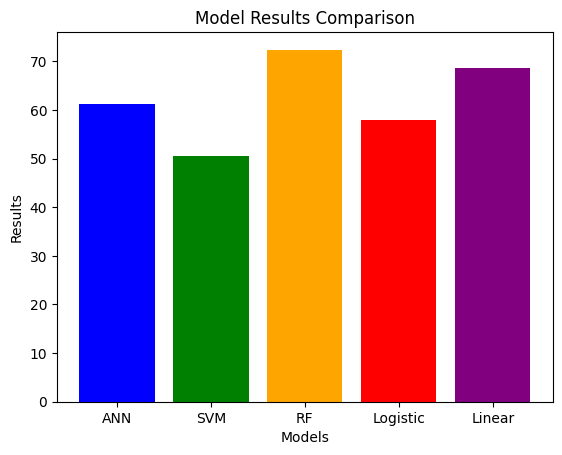

In [ ]:
import matplotlib.pyplot as plt

# Data
results = ['ANN', 'SVM', 'RF', 'Logistic', 'Linear']
values = [ann_result, svm_result, rf_result, log_result, linear_result]  # Replace with actual values

# Plot
plt.bar(results, values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Model Results Comparison')
plt.xlabel('Models')
plt.ylabel('Results')
plt.show()

In [10]:
import pandas as pd

df = pd.read_csv("C:/Semester Work/DAV Project/datasets/vlrDataset.csv")

df = df.dropna()

df["year"] = None

df.loc[(df["patchID"] >= 2.04) & (df["patchID"] <= 3.10), "year"] = 2021
df.loc[(df["patchID"] >= 4.02) & (df["patchID"] <= 5.04), "year"] = 2022
df.loc[(df["patchID"] >= 6.02) & (df["patchID"] <= 7.02), "year"] = 2023
df.loc[(df["patchID"] >= 8.02) & (df["patchID"] <= 9.02), "year"] = 2024

df["agentsPicked"] = (
    df[
        [
            "agent1",
            "agent2",
            "agent3",
            "agent4",
            "agent5",
            "agent6",
            "agent7",
            "agent8",
            "agent9",
            "agent10"
        ]
    ]
    .astype(str)
    .apply(lambda x: ", ".join(x), axis=1)
)

processedDF = df[
    [
        "year",
        "team1_Name",
        "team2_Name",
        "mapName",
        "team1Score",
        "team2Score",
        "agentsPicked"
    ]
]

processedDF.to_csv("C:/Semester Work/DAV Project/datasets/vlrDatasetforVisualisation.csv", index=False)

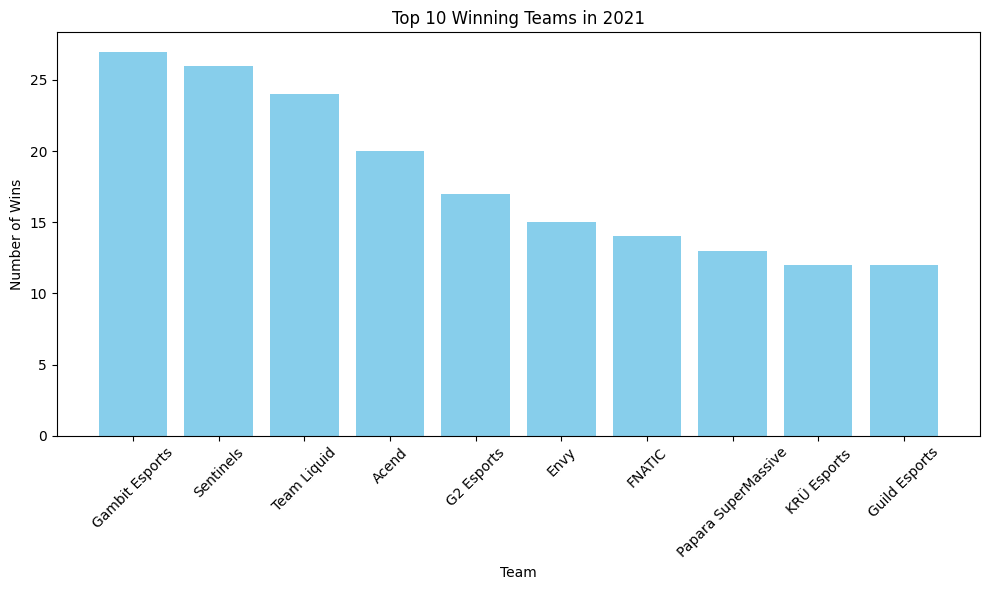

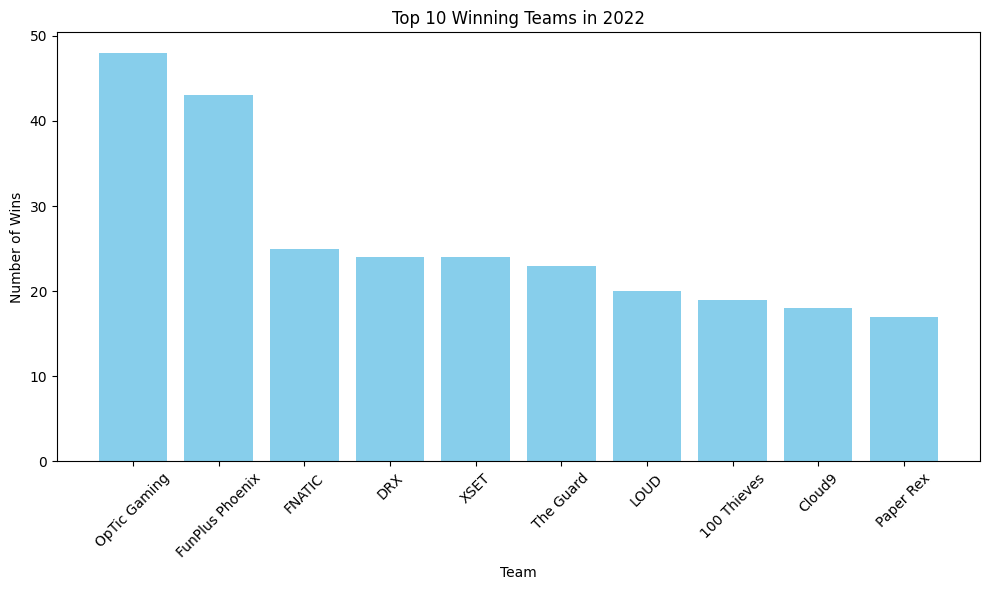

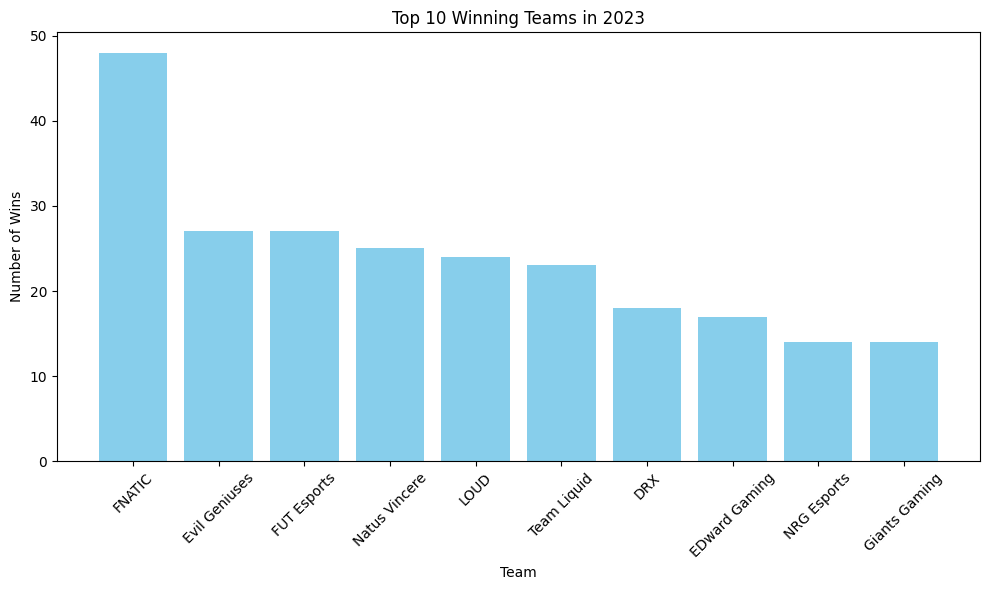

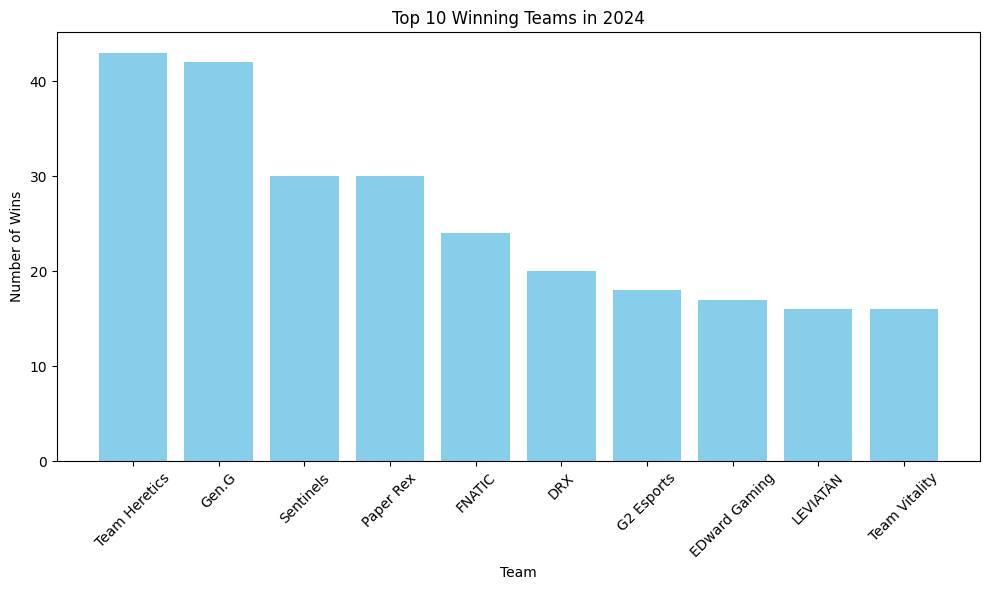

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Semester Work/DAV Project/datasets/vlrDatasetforVisualisation.csv'
data = pd.read_csv(file_path)

if 'year' not in data.columns:
    data['year'] = pd.to_datetime(data['matchDate']).dt.year 

team1_wins = data[data['team1Score'] == 13].groupby(['year', 'team1_Name']).size().reset_index(name='wins')
team2_wins = data[data['team2Score'] == 13].groupby(['year', 'team2_Name']).size().reset_index(name='wins')

team1_wins = team1_wins.rename(columns={'team1_Name': 'team'})
team2_wins = team2_wins.rename(columns={'team2_Name': 'team'})

total_wins = pd.concat([team1_wins, team2_wins])

total_wins = total_wins.groupby(['year', 'team'])['wins'].sum().reset_index()

years = total_wins['year'].unique()
for year in years:
    yearly_data = total_wins[total_wins['year'] == year].sort_values(by='wins', ascending=False).head(10)
    
    plt.figure(figsize=(10, 6))
    plt.bar(yearly_data['team'], yearly_data['wins'], color='skyblue')
    plt.title(f'Top 10 Winning Teams in {year}')
    plt.xlabel('Team')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


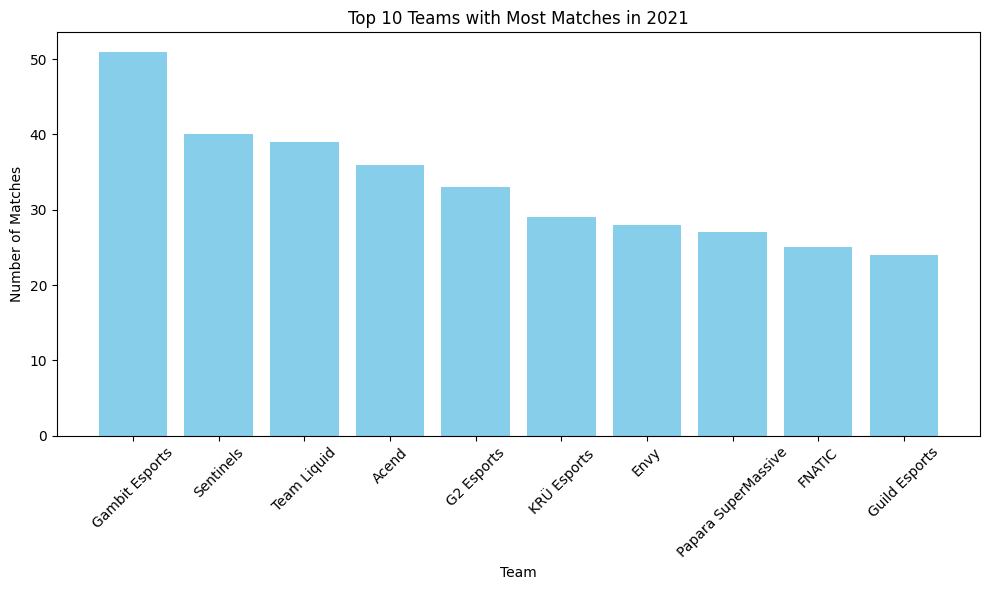

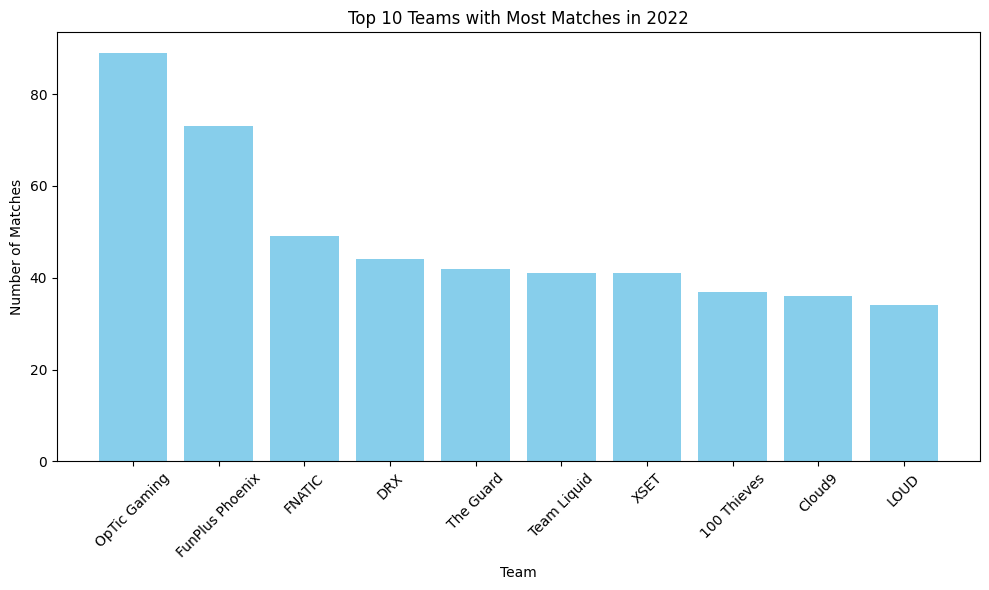

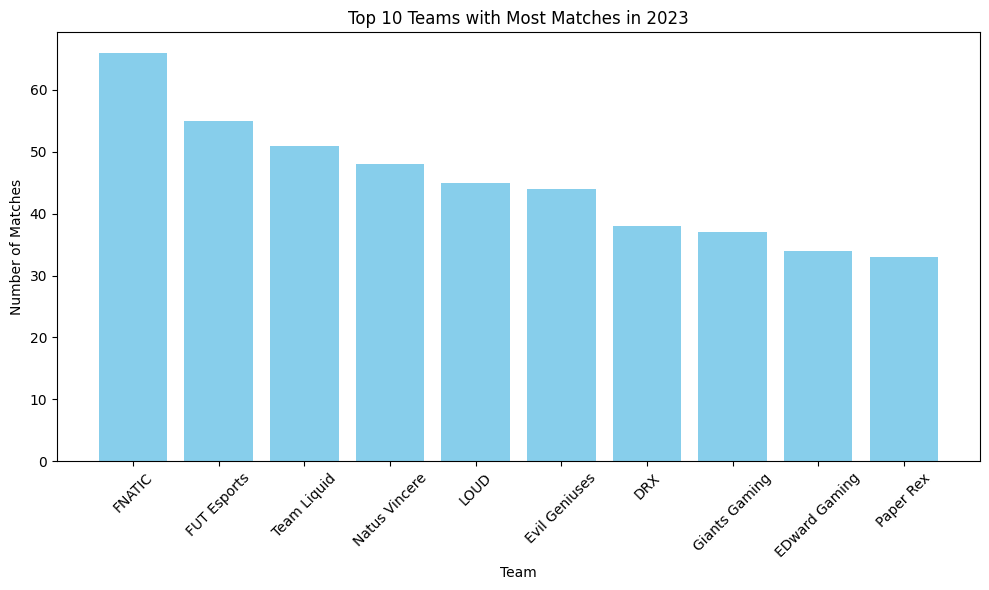

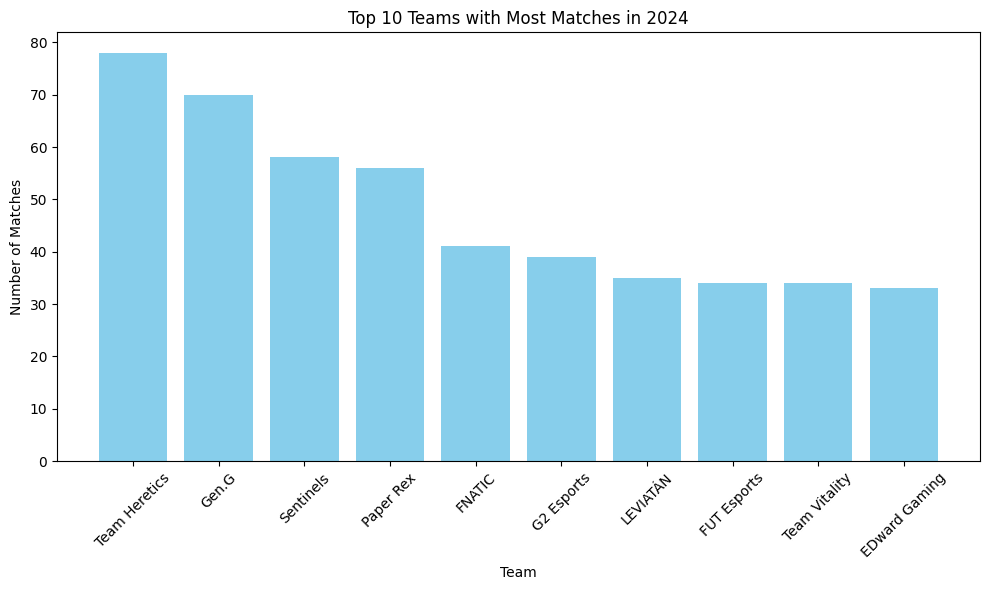

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Semester Work/DAV Project/datasets/vlrDatasetforVisualisation.csv'
data = pd.read_csv(file_path)

if 'year' not in data.columns:
    data['year'] = pd.to_datetime(data['matchDate']).dt.year

team1_matches = data.groupby(['year', 'team1_Name']).size().reset_index(name='matches')
team2_matches = data.groupby(['year', 'team2_Name']).size().reset_index(name='matches')

team1_matches = team1_matches.rename(columns={'team1_Name': 'team'})
team2_matches = team2_matches.rename(columns={'team2_Name': 'team'})

total_matches = pd.concat([team1_matches, team2_matches])

total_matches = total_matches.groupby(['year', 'team'])['matches'].sum().reset_index()

years = total_matches['year'].unique()
for year in years:
    yearly_data = total_matches[total_matches['year'] == year].sort_values(by='matches', ascending=False).head(10)
    
    plt.figure(figsize=(10, 6))
    plt.bar(yearly_data['team'], yearly_data['matches'], color='skyblue')
    plt.title(f'Top 10 Teams with Most Matches in {year}')
    plt.xlabel('Team')
    plt.ylabel('Number of Matches')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


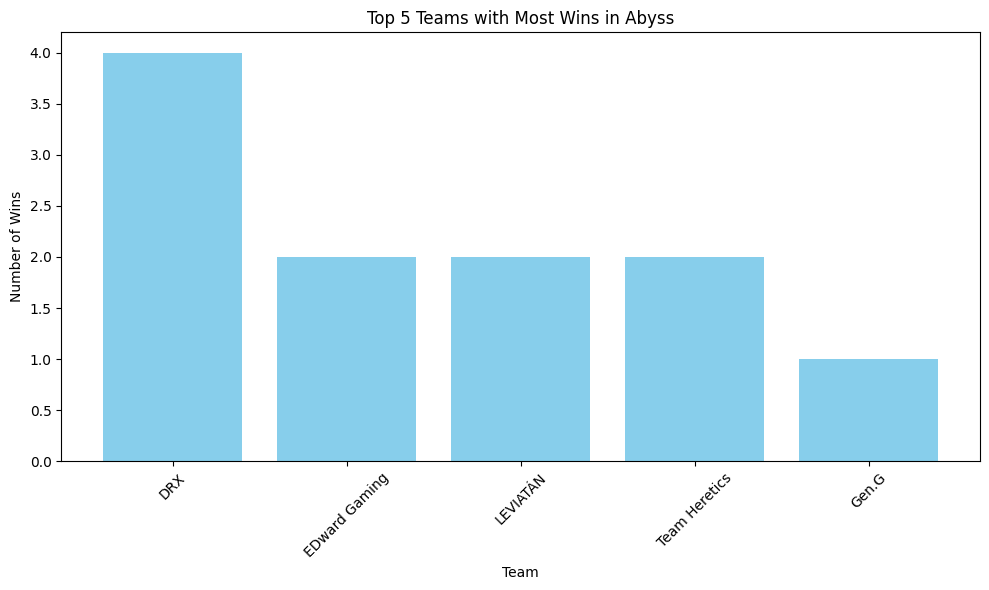

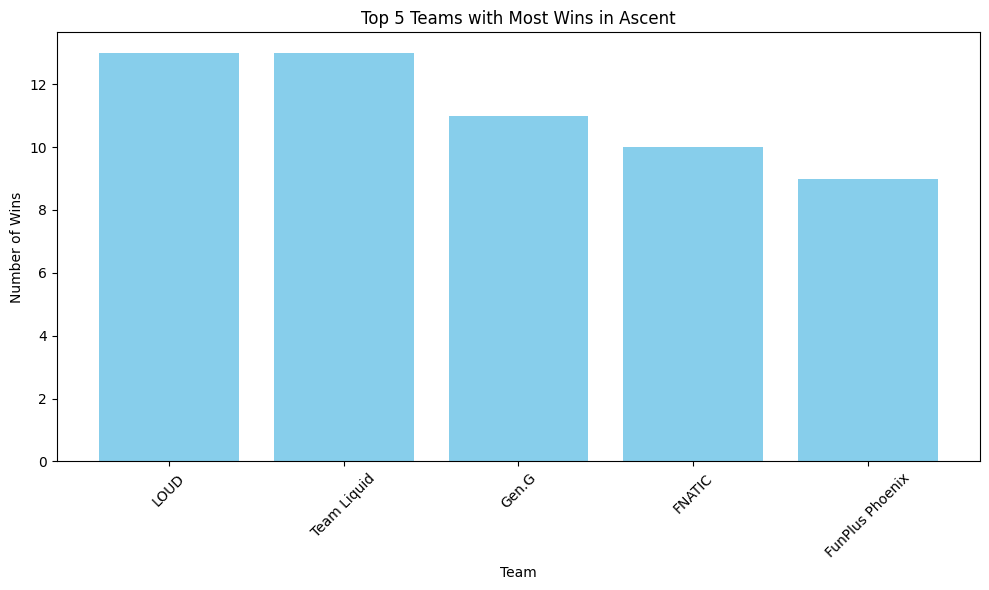

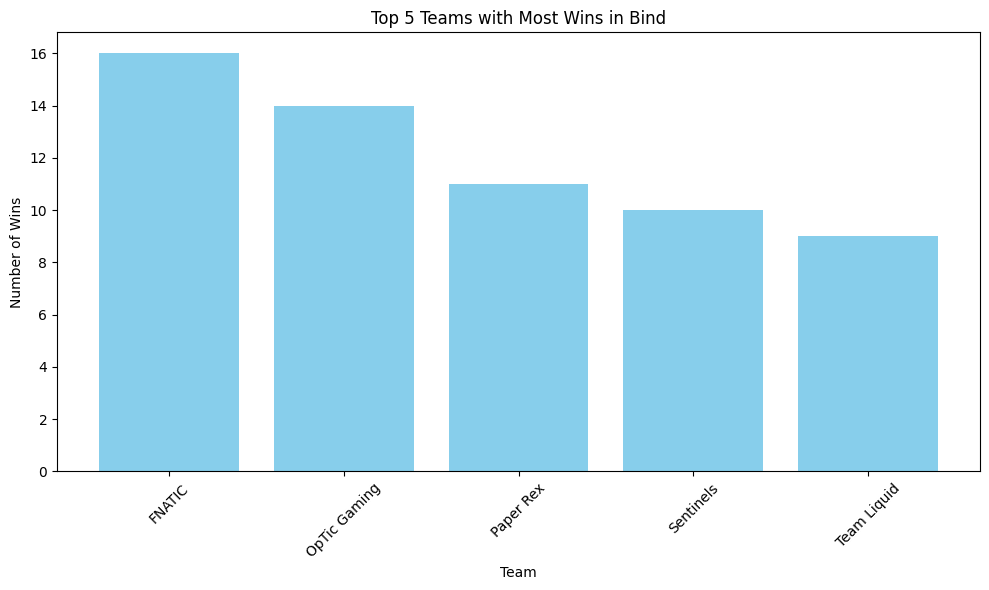

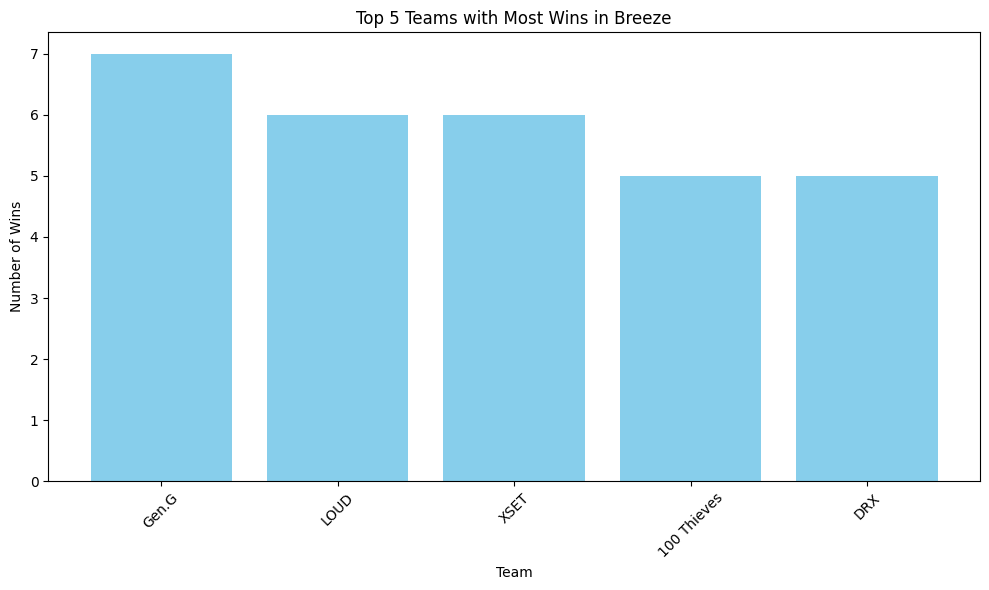

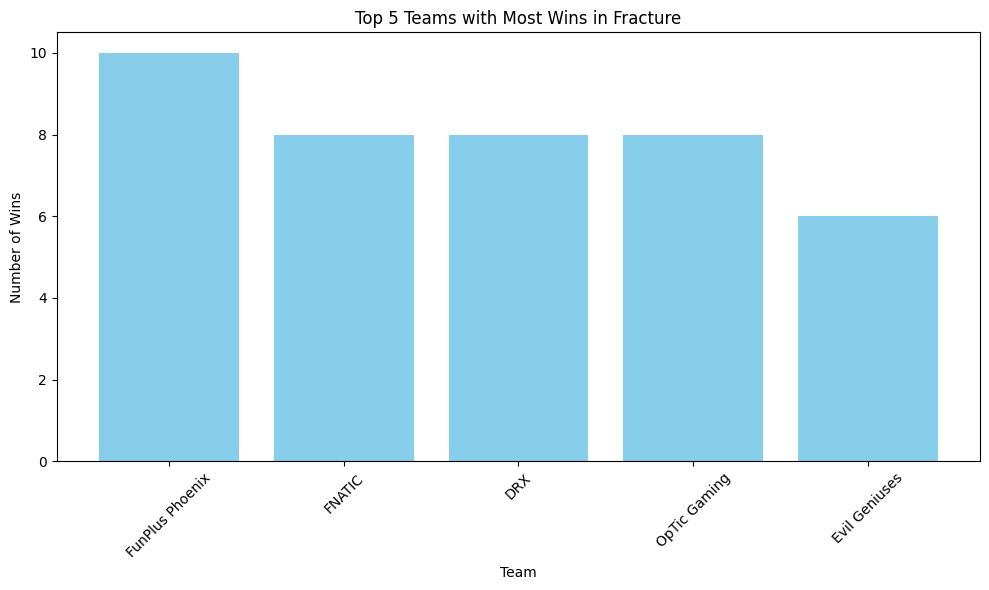

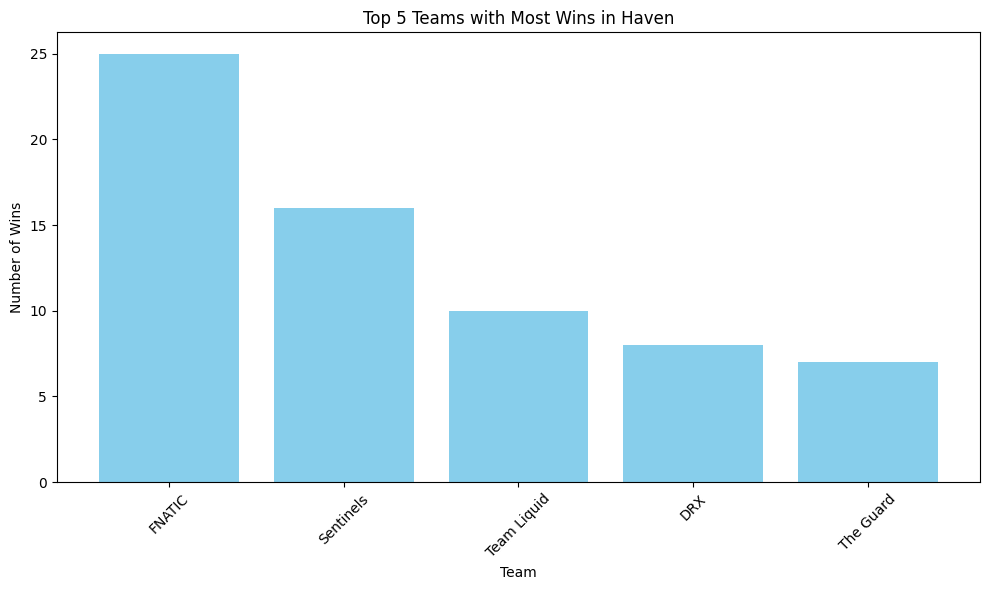

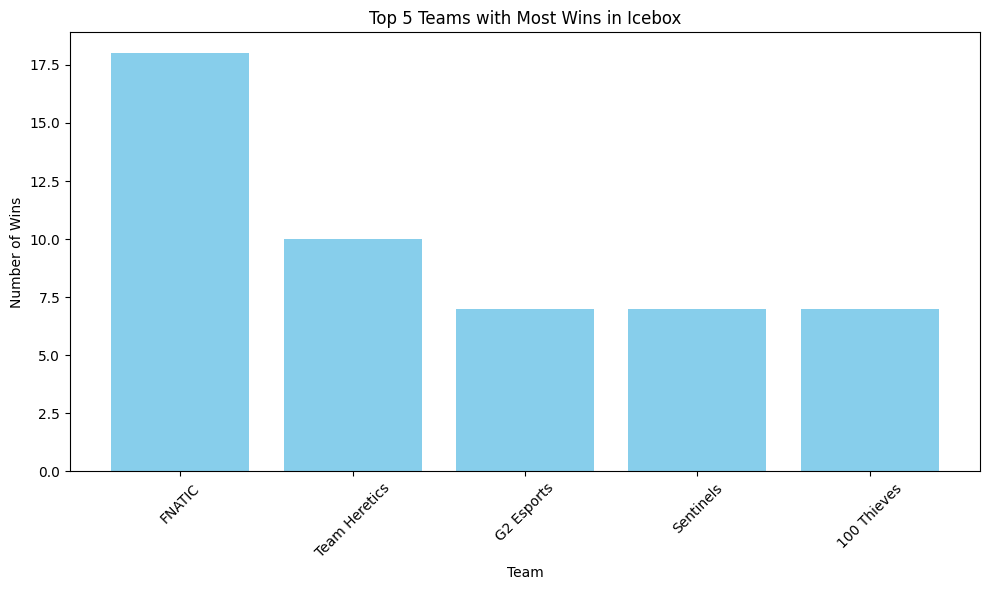

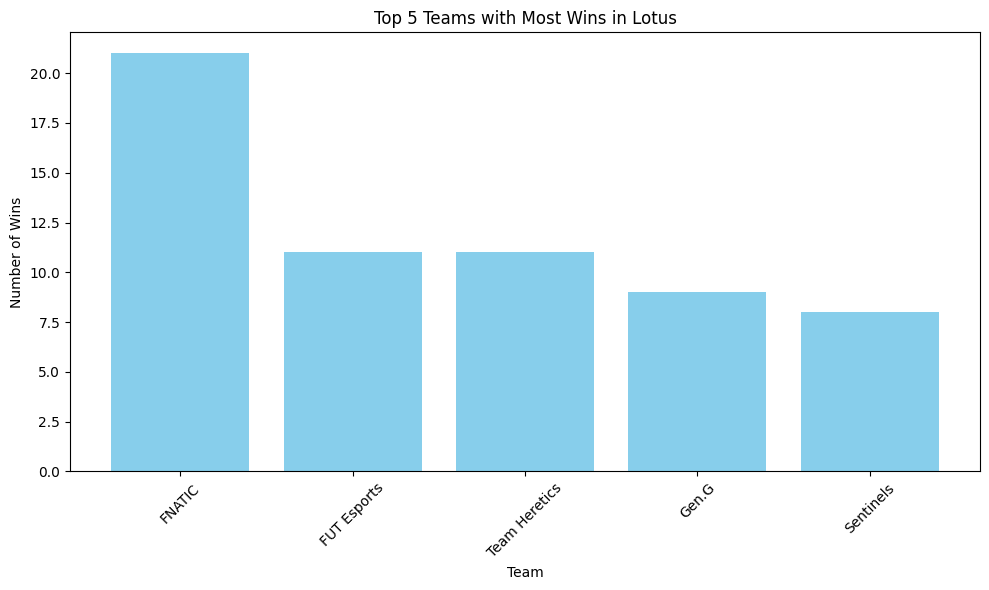

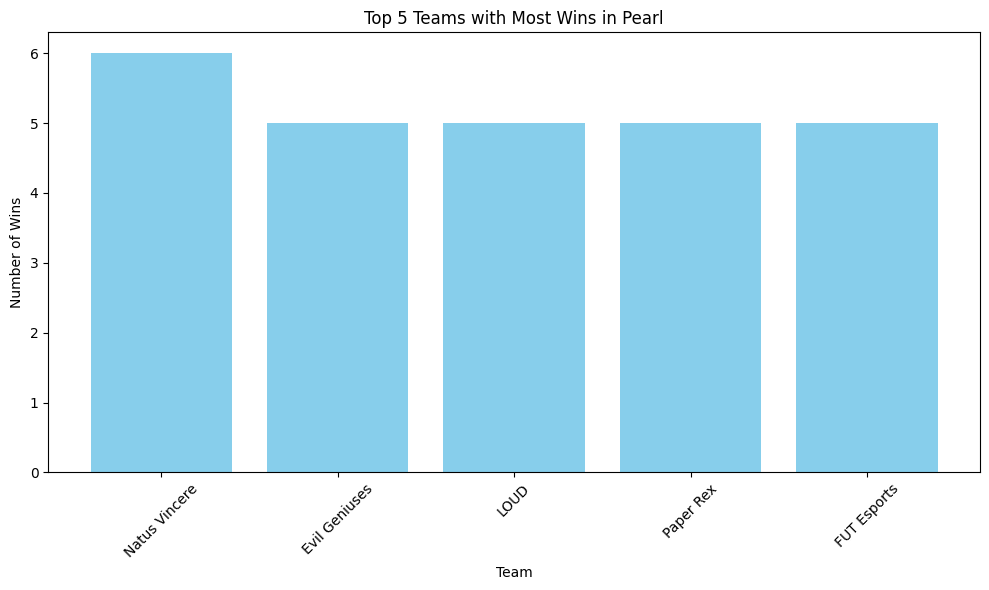

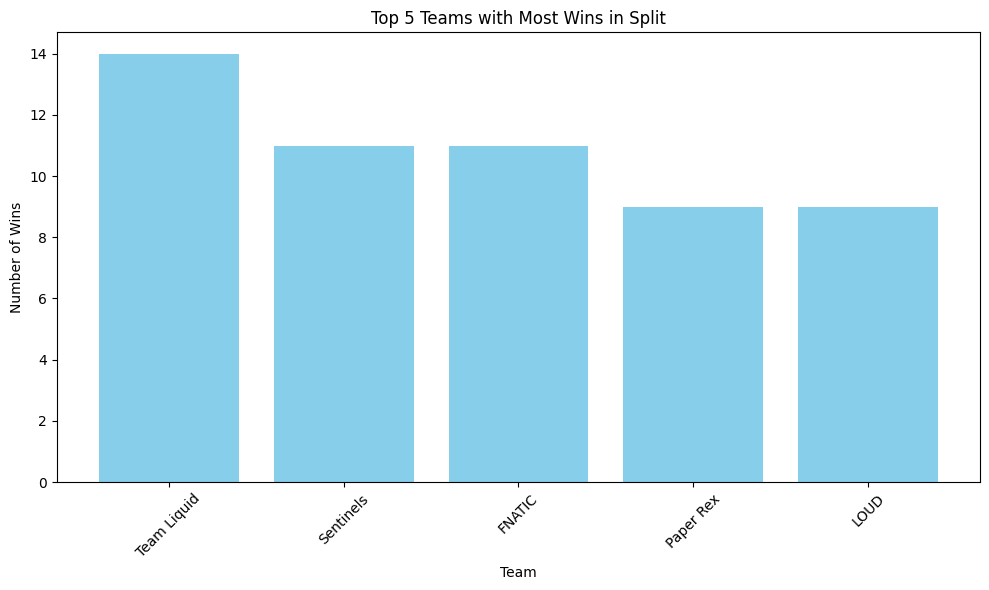

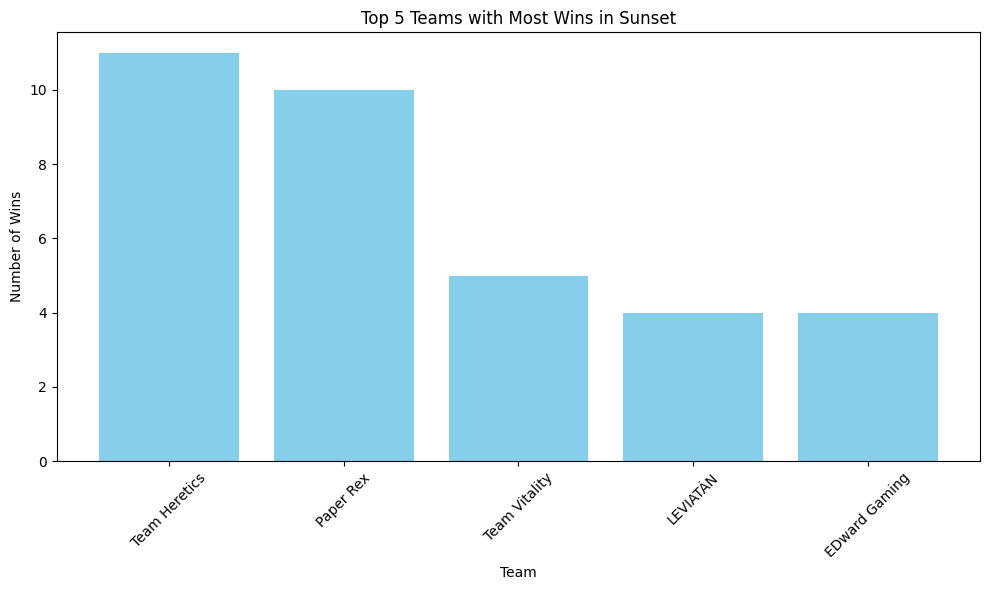

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'C:/Semester Work/DAV Project/datasets/vlrDatasetforVisualisation.csv'
data = pd.read_csv(file_path)

team1_wins = data[data['team1Score'] == 13].groupby(['mapName', 'team1_Name']).size().reset_index(name='wins')
team2_wins = data[data['team2Score'] == 13].groupby(['mapName', 'team2_Name']).size().reset_index(name='wins')

team1_wins = team1_wins.rename(columns={'team1_Name': 'team'})
team2_wins = team2_wins.rename(columns={'team2_Name': 'team'})

total_wins = pd.concat([team1_wins, team2_wins])

total_wins = total_wins.groupby(['mapName', 'team'])['wins'].sum().reset_index()

maps = total_wins['mapName'].unique()
for map_name in maps:
    map_data = total_wins[total_wins['mapName'] == map_name].sort_values(by='wins', ascending=False).head(5)
    
    plt.figure(figsize=(10, 6))
    plt.bar(map_data['team'], map_data['wins'], color='skyblue')
    plt.title(f'Top 5 Teams with Most Wins in {map_name}')
    plt.xlabel('Team')
    plt.ylabel('Number of Wins')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

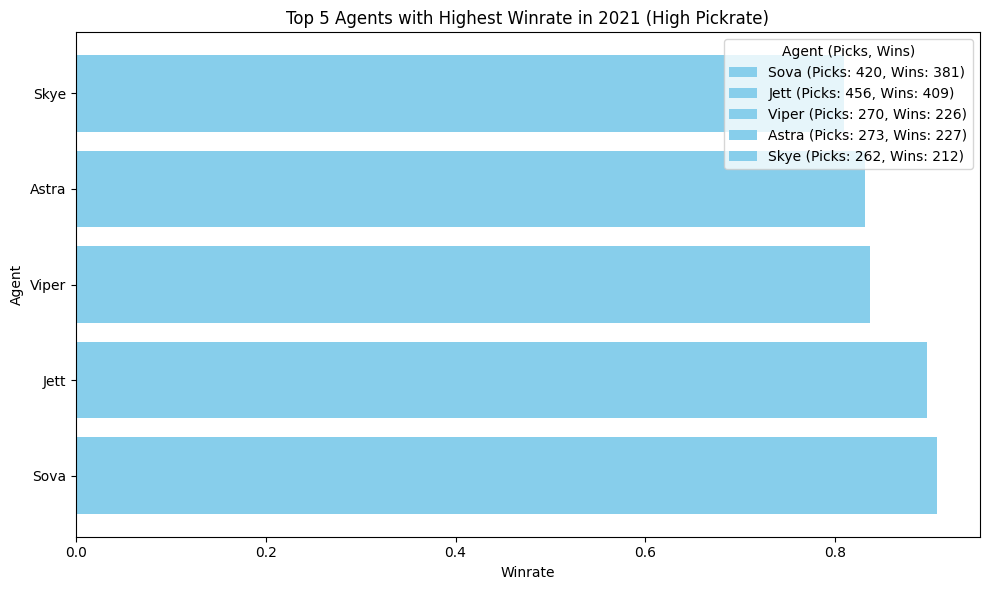

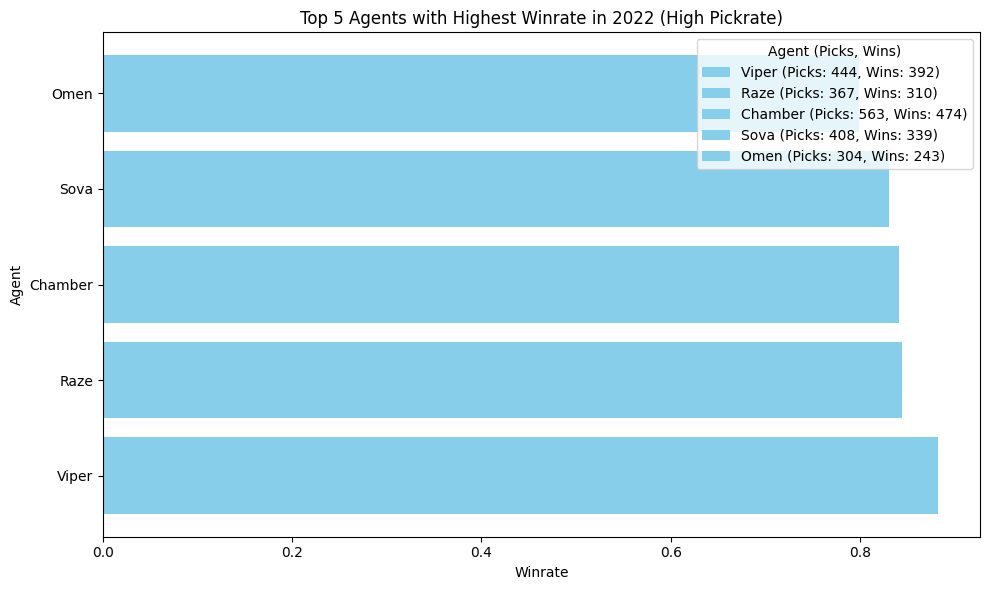

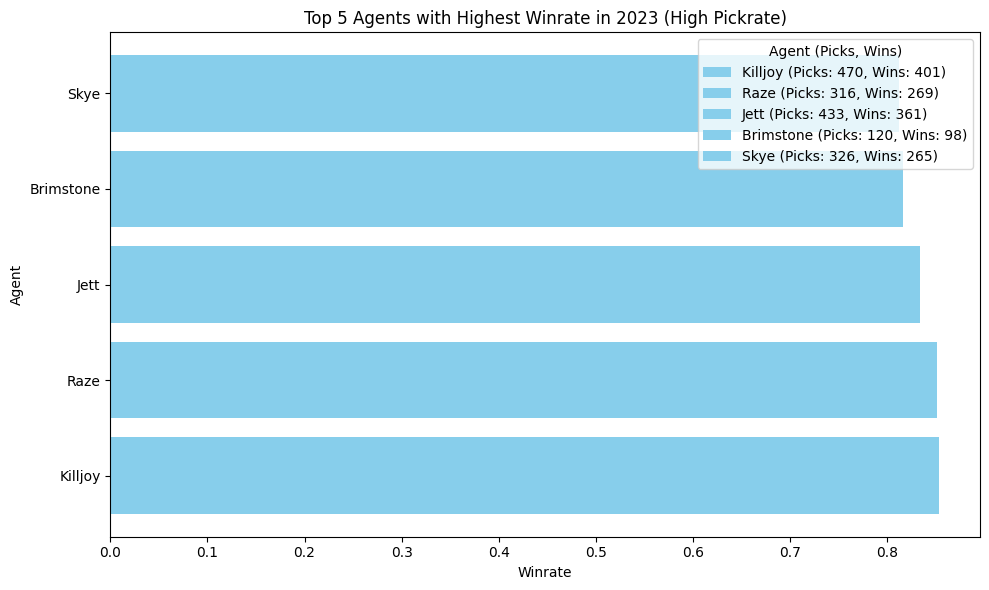

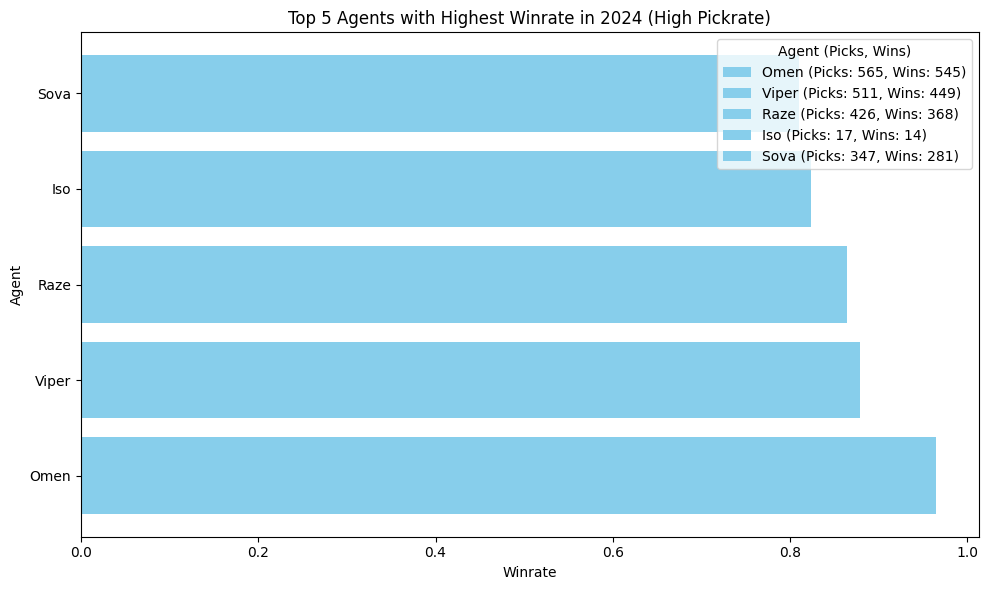

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

file_path = 'C:/Semester Work/DAV Project/datasets/vlrDatasetforVisualisation.csv'
data = pd.read_csv(file_path)

if 'year' not in data.columns:
    data['year'] = pd.to_datetime(data['matchDate']).dt.year  # Replace 'matchDate' with your date column

agent_stats = defaultdict(lambda: defaultdict(lambda: {'picks': 0, 'wins': 0}))

for _, row in data.iterrows():
    team1_agents = row['agentsPicked'].split(', ')[:5]
    team2_agents = row['agentsPicked'].split(', ')[5:]
    
    if row['team1Score'] == 13:
        winning_team = team1_agents
        losing_team = team2_agents
    elif row['team2Score'] == 13:
        winning_team = team2_agents
        losing_team = team1_agents
    
    for agent in team1_agents:
        agent_stats[row['year']][agent]['picks'] += 1
        if agent in winning_team:
            agent_stats[row['year']][agent]['wins'] += 1
            
    for agent in team2_agents:
        agent_stats[row['year']][agent]['picks'] += 1
        if agent in winning_team:
            agent_stats[row['year']][agent]['wins'] += 1

for year in agent_stats:
    agent_winrates = []
    for agent, stats in agent_stats[year].items():
        picks = stats['picks']
        wins = stats['wins']
        if picks > 1:  
            winrate = wins / picks
            agent_winrates.append((agent, winrate, picks, wins))
    
    agent_winrates = sorted(agent_winrates, key=lambda x: (-x[1], -x[2]))  # Sort by winrate, then by pickrate
    
    top_agents = agent_winrates[:5]
    
    top_agents_names = [agent[0] for agent in top_agents]
    top_agents_winrate = [agent[1] for agent in top_agents]
    top_agents_picks = [agent[2] for agent in top_agents]
    top_agents_wins = [agent[3] for agent in top_agents]
    
    legend_labels = [f'{name} (Picks: {picks}, Wins: {wins})' 
                     for name, picks, wins in zip(top_agents_names, top_agents_picks, top_agents_wins)]
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(top_agents_names, top_agents_winrate, color='skyblue')

    plt.legend(bars, legend_labels, title='Agent (Picks, Wins)')
    
    plt.xlabel('Winrate')
    plt.ylabel('Agent')
    plt.title(f'Top 5 Agents with Highest Winrate in {year} (High Pickrate)')
    plt.tight_layout()
    plt.show()

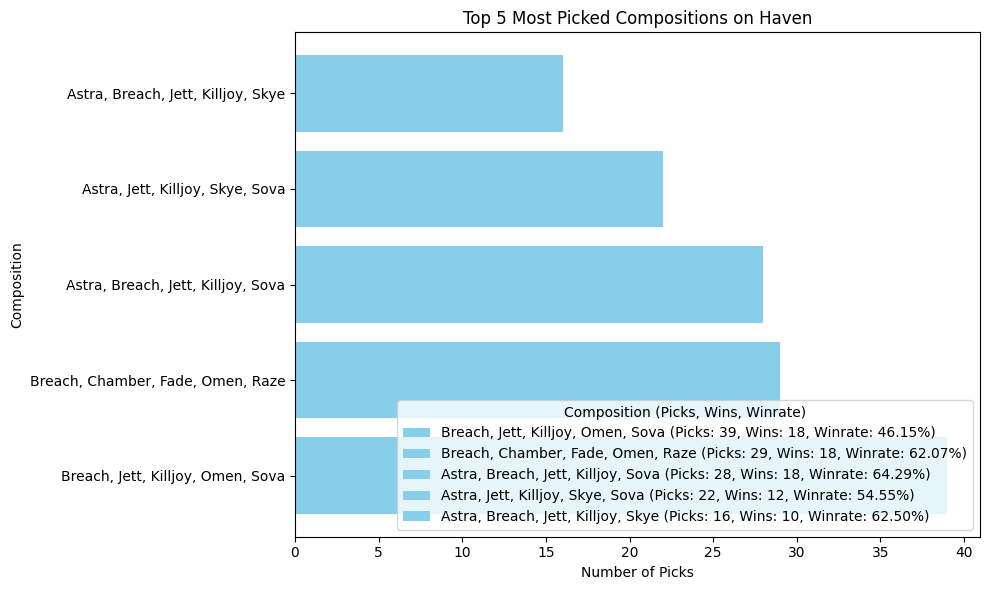

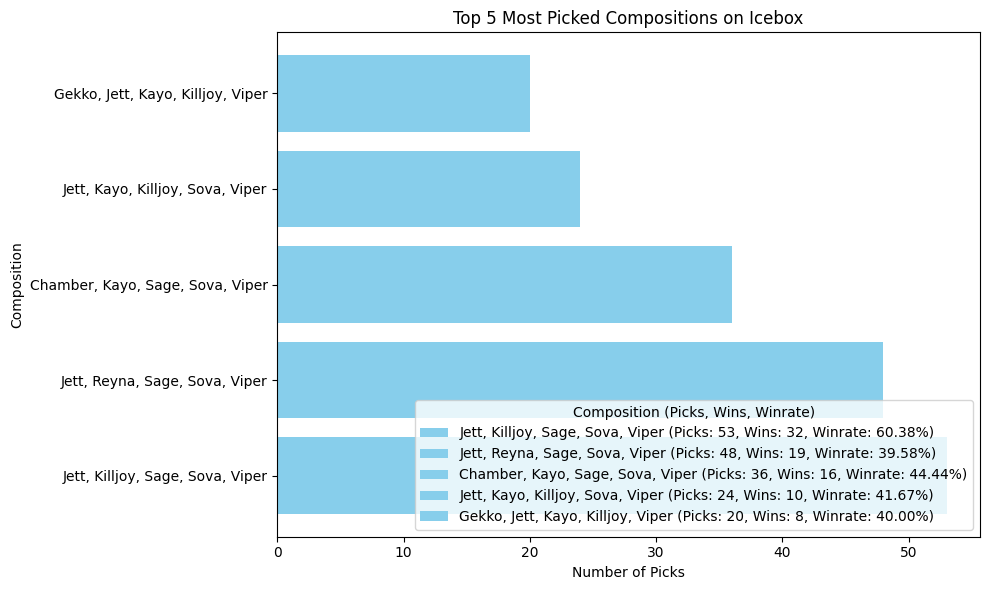

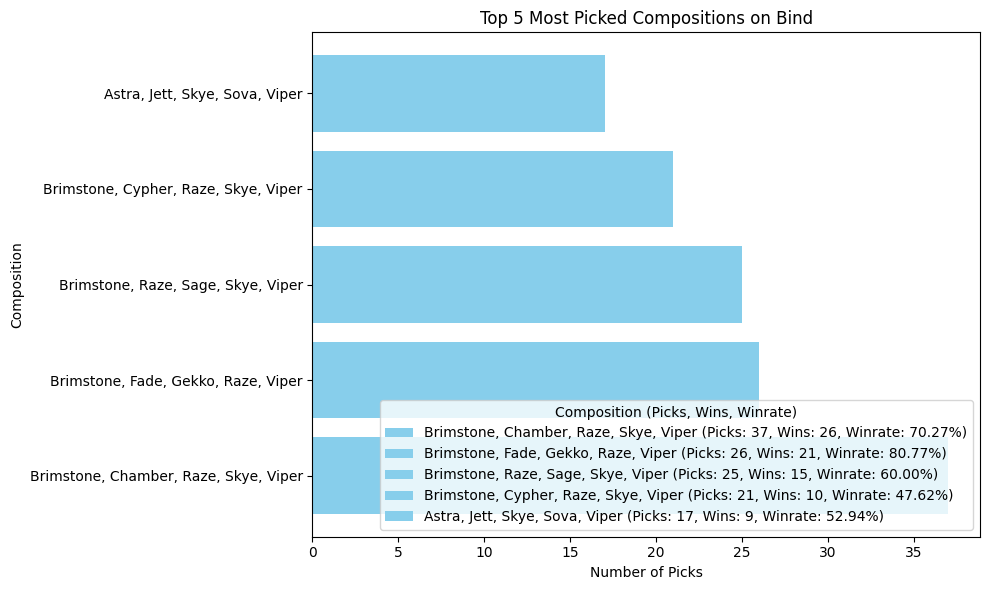

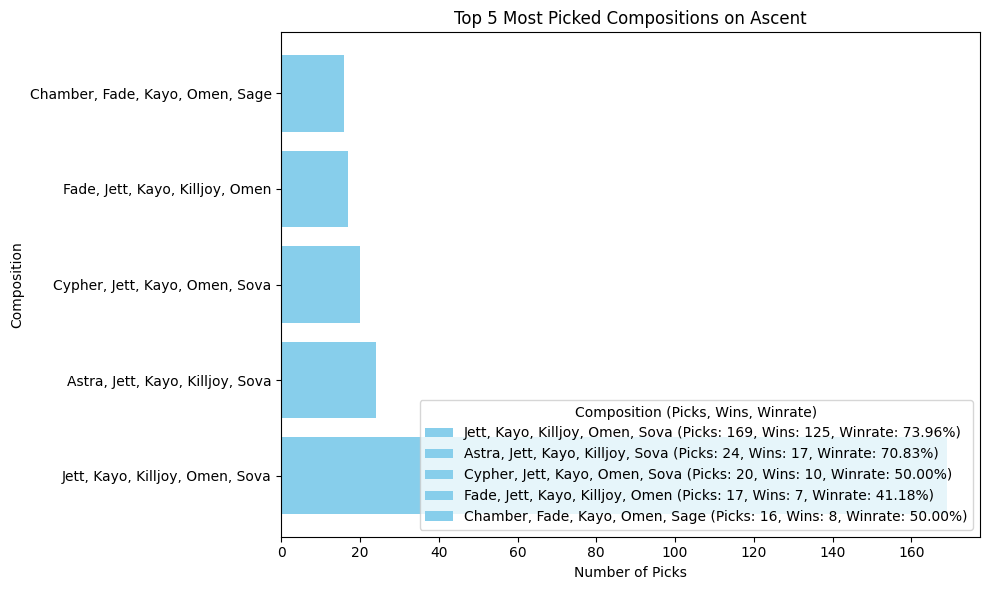

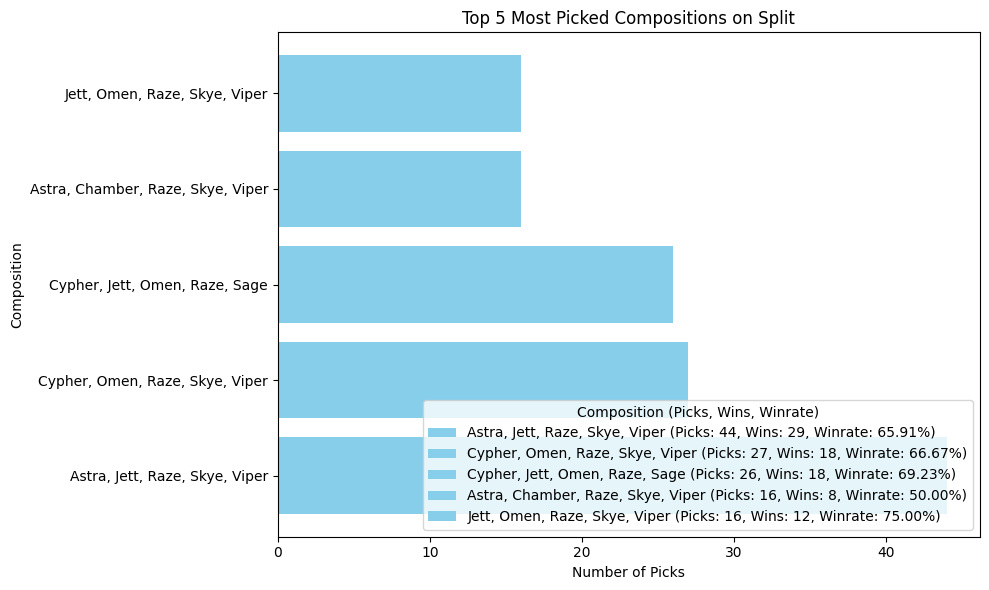

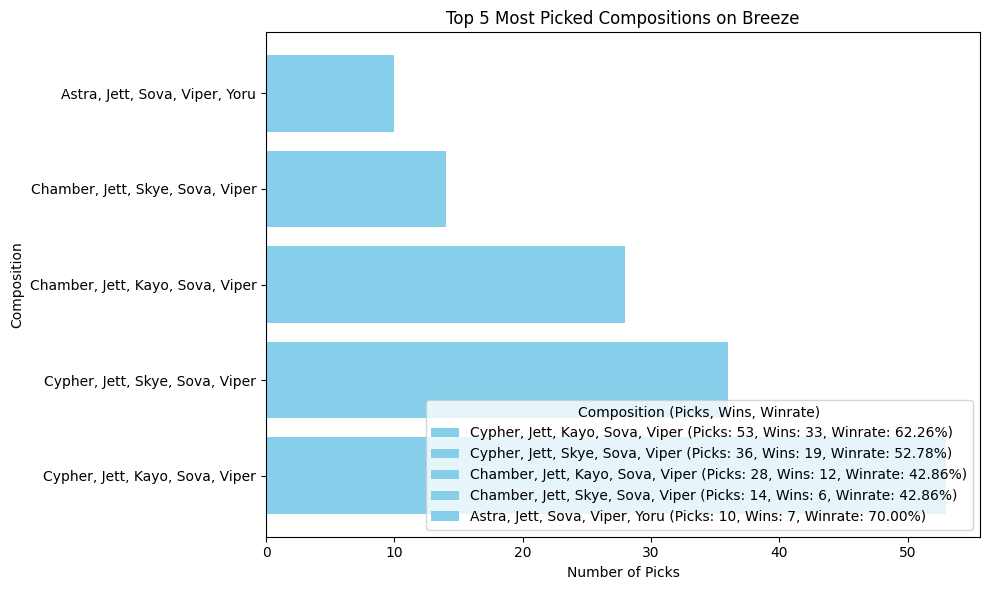

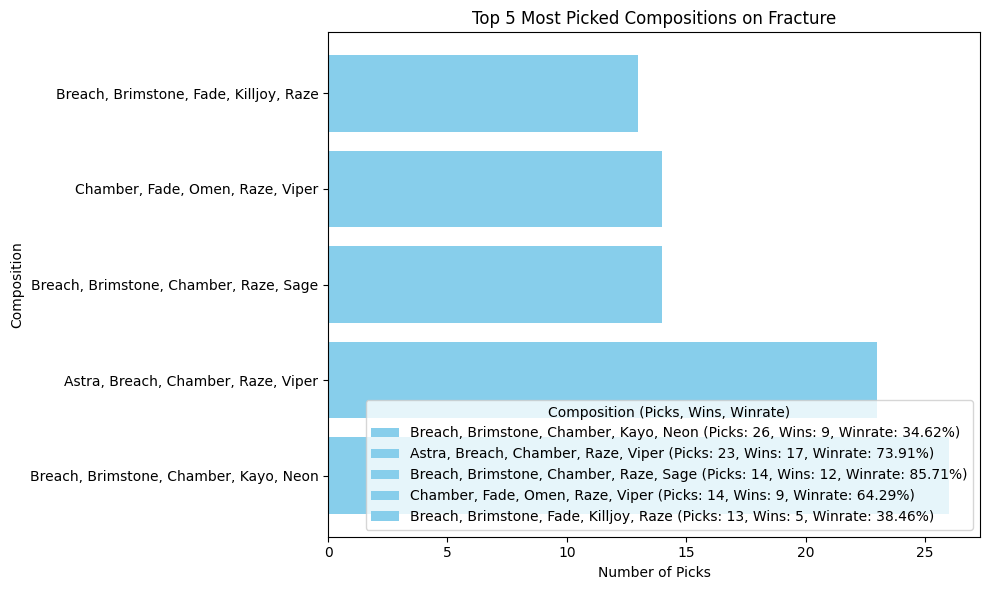

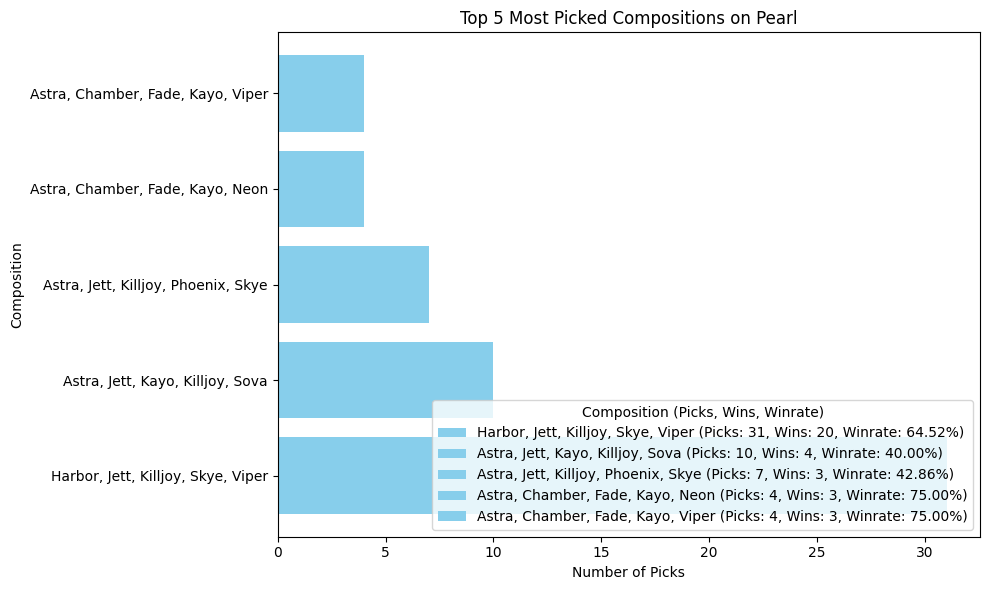

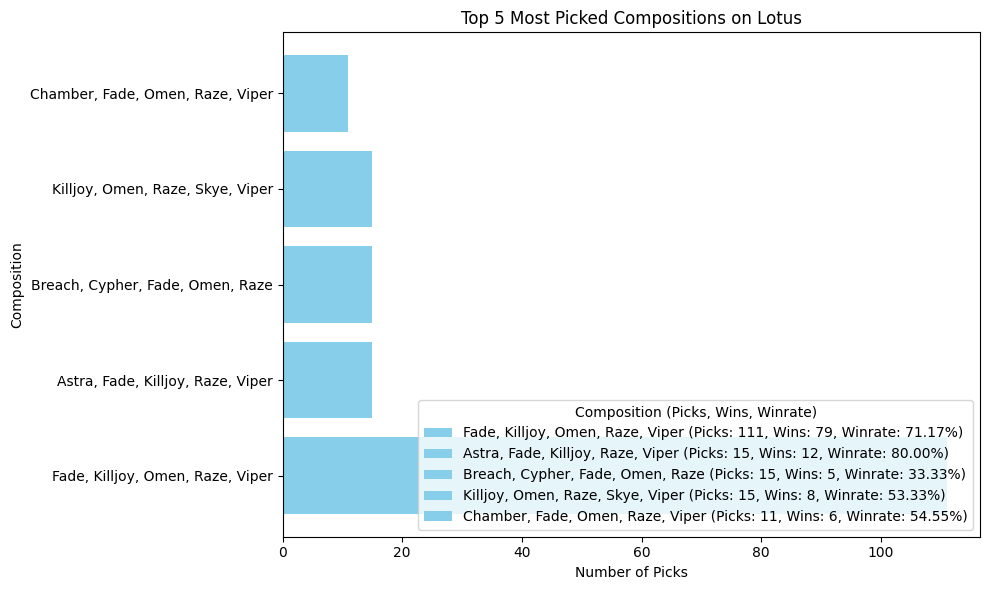

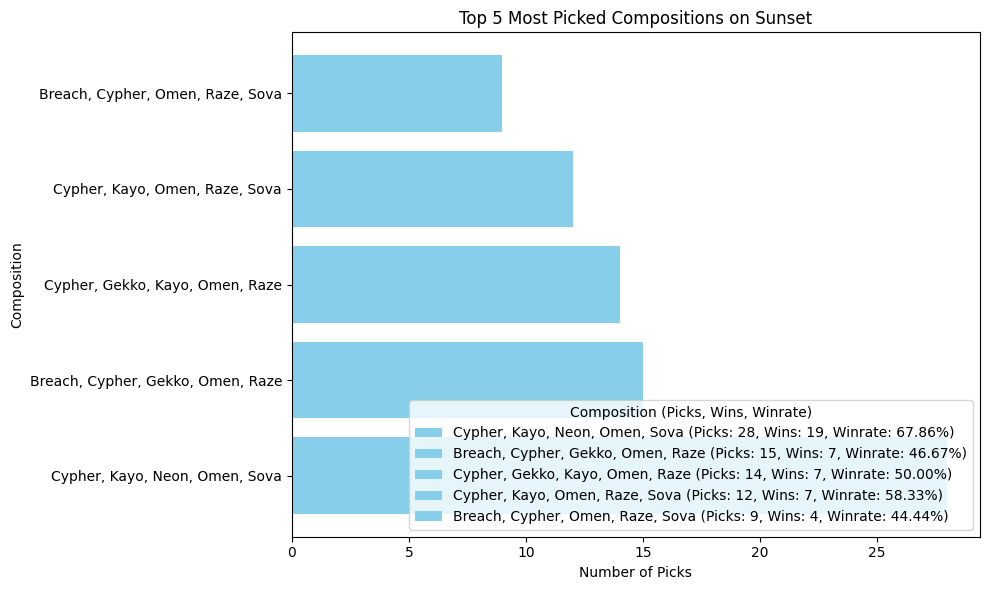

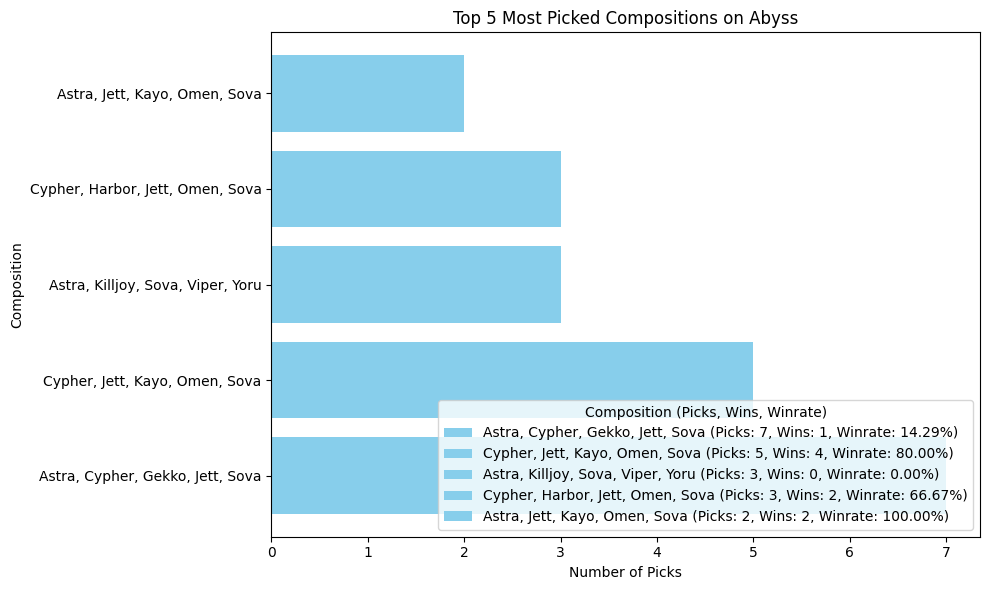

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

file_path = 'C:/Semester Work/DAV Project/datasets/vlrDatasetforVisualisation.csv'
data = pd.read_csv(file_path)

composition_stats = defaultdict(lambda: defaultdict(lambda: {'picks': 0, 'wins': 0}))

for _, row in data.iterrows():
    team1_composition = ', '.join(sorted(row['agentsPicked'].split(', ')[:5]))
    team2_composition = ', '.join(sorted(row['agentsPicked'].split(', ')[5:]))
    
    map_name = row['mapName']
    
    if row['team1Score'] == 13:
        winning_composition = team1_composition
        losing_composition = team2_composition
    elif row['team2Score'] == 13:
        winning_composition = team2_composition
        losing_composition = team1_composition
    
    composition_stats[map_name][team1_composition]['picks'] += 1
    if team1_composition == winning_composition:
        composition_stats[map_name][team1_composition]['wins'] += 1
    
    composition_stats[map_name][team2_composition]['picks'] += 1
    if team2_composition == winning_composition:
        composition_stats[map_name][team2_composition]['wins'] += 1

for map_name, stats in composition_stats.items():
    compositions = [{'composition': comp, 'picks': data['picks'], 'wins': data['wins']}
                    for comp, data in stats.items()]
    compositions_df = pd.DataFrame(compositions)
    
    compositions_df['winrate'] = compositions_df['wins'] / compositions_df['picks']
    
    compositions_df = compositions_df.sort_values(by=['picks', 'composition'], ascending=[False, True])
    
    top_compositions = compositions_df.head(5)
    
    compositions_list = top_compositions['composition']
    picks_list = top_compositions['picks']
    wins_list = top_compositions['wins']
    winrate_list = top_compositions['winrate']
    
    legend_labels = [f"{comp} (Picks: {picks}, Wins: {wins}, Winrate: {winrate:.2%})" 
                     for comp, picks, wins, winrate in zip(compositions_list, picks_list, wins_list, winrate_list)]
    
    plt.figure(figsize=(10, 6))
    bars = plt.barh(compositions_list, picks_list, color='skyblue')
    plt.legend(bars, legend_labels, title='Composition (Picks, Wins, Winrate)', loc='lower right')
    plt.xlabel('Number of Picks')
    plt.ylabel('Composition')
    plt.title(f'Top 5 Most Picked Compositions on {map_name}')
    plt.tight_layout()
    plt.show()


In [7]:
import pandas as pd

df = pd.read_csv("C:/Semester Work/DAV Project/datasets/vlrDataset.csv")

df = df.dropna()

df["year"] = None

df.loc[(df["patchID"] >= 2.04) & (df["patchID"] <= 3.10), "year"] = 2021
df.loc[(df["patchID"] >= 4.02) & (df["patchID"] <= 5.04), "year"] = 2022
df.loc[(df["patchID"] >= 6.02) & (df["patchID"] <= 7.02), "year"] = 2023
df.loc[(df["patchID"] >= 8.02) & (df["patchID"] <= 9.02), "year"] = 2024

df["agentsPicked"] = (
    df[
        [
            "agent1",
            "agent2",
            "agent3",
            "agent4",
            "agent5",
            "agent6",
            "agent7",
            "agent8",
            "agent9",
            "agent10"
        ]
    ]
    .astype(str)
    .apply(lambda x: ", ".join(x), axis=1)
)

df['team1Agents'] = df['agentsPicked'].apply(lambda x: ', '.join(sorted(x.split(', ')[:5])))
df['team2Agents'] = df['agentsPicked'].apply(lambda x: ', '.join(sorted(x.split(', ')[5:])))

df['winningTeam'] = df.apply(
    lambda row: row['team1_Name'] if row['team1Score'] == 13 else row['team2_Name'],
    axis=1
)

processedDF = df[
    [
        "year",
        "team1_Name",
        "team2_Name",
        "winningTeam",
        "mapName",
        "team1Score",
        "team2Score",
        "team1Agents",
        "team2Agents",
        "agentsPicked"
    ]
]

processedDF.to_csv("C:/Semester Work/DAV Project/datasets/vlrDatasetforPowerBI.csv", index=False)